# 3. Report
## 3.1 Overview of Subset dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
divvy_clean= pd.read_csv("divvy_clean2.csv", index_col=0)

In [3]:
# Overview of data shape and composition
print(divvy_clean.shape)
print(divvy_clean.dtypes)
print(divvy_clean.head(10))

(4612376, 10)
ride_id                object
rideable_type          object
start_station_name     object
end_station_name       object
travel_time             int64
day_of_week            object
hour                  float64
month                  object
travel_distance       float64
member_casual          object
dtype: object
            ride_id  rideable_type            start_station_name  \
0  0A1B623926EF4E16    docked_bike  Michigan Ave & Washington St   
1  B2D5583A5A5E76EE   classic_bike    California Ave & Cortez St   
2  6F264597DDBF427A   classic_bike          Wabash Ave & 16th St   
3  379B58EAB20E8AA5   classic_bike    California Ave & Cortez St   
4  6615C1E4EB08E8FB  electric_bike    California Ave & Cortez St   
5  62DC2B32872F9BA8  electric_bike    California Ave & Cortez St   
6  4BBB6E80E6A2A16D   classic_bike    California Ave & Cortez St   
7  22CA03D32C6BB094   classic_bike          Clark St & North Ave   
8  61F0D07D1EEE72EE   classic_bike    Sheridan Rd & Montrose

I would be changing the hours, day of week and month columns into ordered categorical types in order to aid better visualisation

In [4]:
# changing hours column into an ordered categorical types
cats = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24]
divvy_clean['hour'] = pd.Categorical(divvy_clean['hour'], categories=cats, ordered=True)

In [5]:
# changing day_of_week column into an ordered categorical types
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
divvy_clean['day_of_week'] = pd.Categorical(divvy_clean['day_of_week'], categories=cats, ordered=True)

In [6]:
# changing month column into an ordered categorical types
cats = ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December']
divvy_clean['month'] = pd.Categorical(divvy_clean['month'], categories=cats, ordered=True)

Since one of the important aspects of this analysis would be to see the difference in pattern between the member and casual cyclers, I would be filtering them into seperate frames to see understand them better

In [7]:
casual = divvy_clean[divvy_clean['member_casual'] == 'casual']
member = divvy_clean[divvy_clean['member_casual'] == 'member']

In [8]:
# descriptive statistics for numeric variables
print(divvy_clean.info())
print(divvy_clean.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4612376 entries, 0 to 5900384
Data columns (total 10 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ride_id             object  
 1   rideable_type       object  
 2   start_station_name  object  
 3   end_station_name    object  
 4   travel_time         int64   
 5   day_of_week         category
 6   hour                category
 7   month               category
 8   travel_distance     float64 
 9   member_casual       object  
dtypes: category(3), float64(1), int64(1), object(5)
memory usage: 294.7+ MB
None
        travel_time  travel_distance
count  4.612376e+06     4.612376e+06
mean   1.904224e+01     2.142257e+00
std    1.194934e+02     1.942495e+00
min    1.000000e+00     0.000000e+00
25%    6.000000e+00     9.300862e-01
50%    1.100000e+01     1.617814e+00
75%    2.000000e+01     2.799129e+00
max    4.910700e+04     1.189523e+03


In [9]:
# descriptive statistics for numeric variables
print(casual.info())
print(casual.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984174 entries, 0 to 5900384
Data columns (total 10 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ride_id             object  
 1   rideable_type       object  
 2   start_station_name  object  
 3   end_station_name    object  
 4   travel_time         int64   
 5   day_of_week         category
 6   hour                category
 7   month               category
 8   travel_distance     float64 
 9   member_casual       object  
dtypes: category(3), float64(1), int64(1), object(5)
memory usage: 126.8+ MB
None
        travel_time  travel_distance
count  1.984174e+06     1.984174e+06
mean   2.791414e+01     2.224636e+00
std    1.806525e+02     2.139490e+00
min    1.000000e+00     0.000000e+00
25%    9.000000e+00     9.894881e-01
50%    1.500000e+01     1.721898e+00
75%    2.800000e+01     2.916309e+00
max    4.910700e+04     1.189523e+03


In [10]:
# descriptive statistics for numeric variables
print(member.info())
print(member.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628202 entries, 2 to 5900381
Data columns (total 10 columns):
 #   Column              Dtype   
---  ------              -----   
 0   ride_id             object  
 1   rideable_type       object  
 2   start_station_name  object  
 3   end_station_name    object  
 4   travel_time         int64   
 5   day_of_week         category
 6   hour                category
 7   month               category
 8   travel_distance     float64 
 9   member_casual       object  
dtypes: category(3), float64(1), int64(1), object(5)
memory usage: 167.9+ MB
None
        travel_time  travel_distance
count  2.628202e+06     2.628202e+06
mean   1.234435e+01     2.080064e+00
std    1.777473e+01     1.776855e+00
min    1.000000e+00     0.000000e+00
25%    5.000000e+00     8.964038e-01
50%    9.000000e+00     1.538183e+00
75%    1.500000e+01     2.688869e+00
max    1.492000e+03     2.634435e+01


## 3.2 DATA STRUCTURE
  The cleaned Cyclistic data set has 4612376 rows and 10 columns. The data ranges from july 2021 to june 2022. This shows the data set is huge and recent which means credible insights can be generayed from them. 
The data has different data types which include: <br>
** floats:** travel_distance <br>
** int64:** travel_time <br>
** object:** ride_id, rideable_type, start_station_name, end_station_name, member_casual <br>
** category:** hours, day_of_week, month

There are a total of 2628202 member ride trips  and 1984174 casual ride trips 

# 4. Visualization And Analysis

### 4.1
I would be analysing the difference between the number of times a bike is collected from the station and average time spent riding by the member and casual cyclist throughout the year

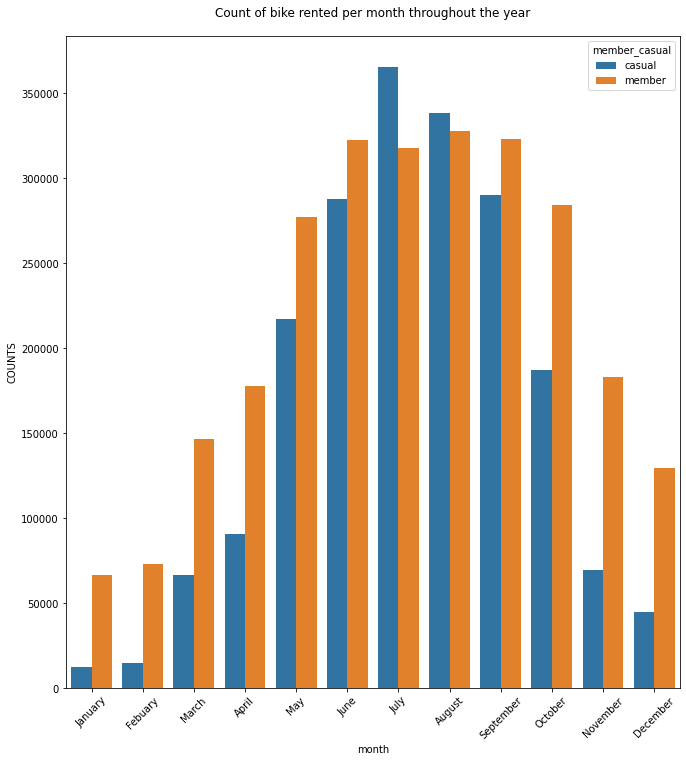

In [11]:
# finding the count of trips by month for members and casual riders
fig, ax = plt.subplots( figsize = [11,12])

h=sns.countplot(x="month", data=divvy_clean, hue="member_casual", ax=ax)
# Add title and axis labels
h.set_title("Count of bike rented per month throughout the year", y=1.02)
h.set(xlabel="month", 
       ylabel="COUNTS")

plt.xticks(rotation=45)



# Show plot
plt.show()



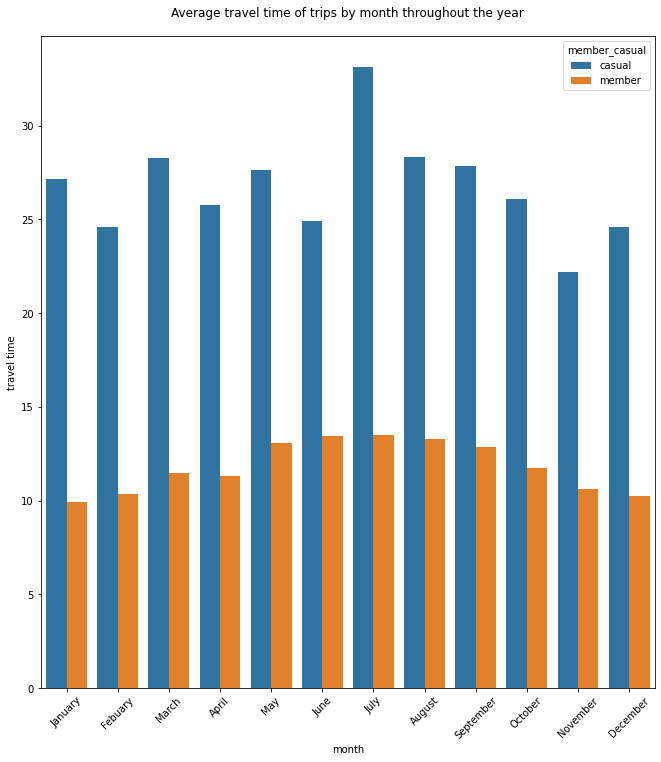

In [12]:
# finding average travel time of trips by month for members and casual riders
fig, ax = plt.subplots( figsize = [11,12])
g=sns.barplot(x="month", y="travel_time", data=divvy_clean, hue="member_casual", ci=None, ax=ax)
# Add title and axis labels
g.set_title("Average travel time of trips by month throughout the year", y=1.02)
g.set(xlabel="month", 
       ylabel="travel time")

plt.xticks(rotation=45)


# Show plot
plt.show()


### OBSERVATION
1. The members rented the bikes more but they spend far lesser time on them after rentage since casual riders top by about 15 minutes travel time through out the year as seen in the second plot.<br>
2. There are more bike rentage in the middle of the year and casual riders also top during this period unlike other months this probably because this falls in the summer holiday period in Chicago.
 

### 4.2
  I would be viualising the trend of daily bike rentage for members and casual riders for the past year

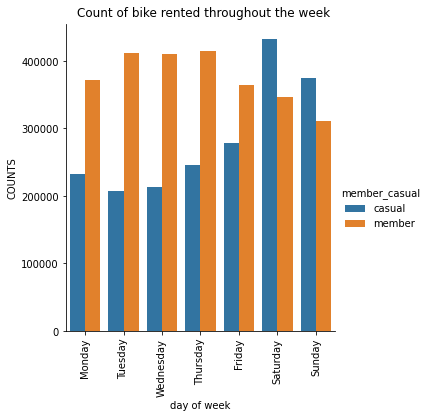

In [13]:
# finding the count of trips by day of the week for members and casual riders
g=sns.catplot(x="day_of_week", data=divvy_clean, kind="count", hue="member_casual")
# Add title and axis labels
g.fig.suptitle("Count of bike rented throughout the week", y=1.02)
g.set(xlabel="day of week", 
       ylabel="COUNTS")

plt.xticks(rotation=90)

# Show plot
plt.show()

g.fig.savefig("day_of_week2.jpg", dpi=200)

### OBSERVATION
From the plot, it can be observed that the members rent the bikes more during weekdays and casual riders rent thems more during weekends hinting that the casual riders mostly use the bikes for leisure.

### 4.3   
   I would be finding and visualising the top ten start locations for the members and casual riders during the period of the past year.


                  unique_counts  counts
0      Kingsbury St & Kinzie St   24772
1             Clark St & Elm St   22829
2         Wells St & Concord Ln   22468
3             Wells St & Elm St   19908
4       Clinton St & Madison St   18327
5  Clinton St & Washington Blvd   18103
6         Dearborn St & Erie St   17803
7           Wells St & Huron St   17661
8        St. Clair St & Erie St   17467
9           Ellis Ave & 60th St   16807


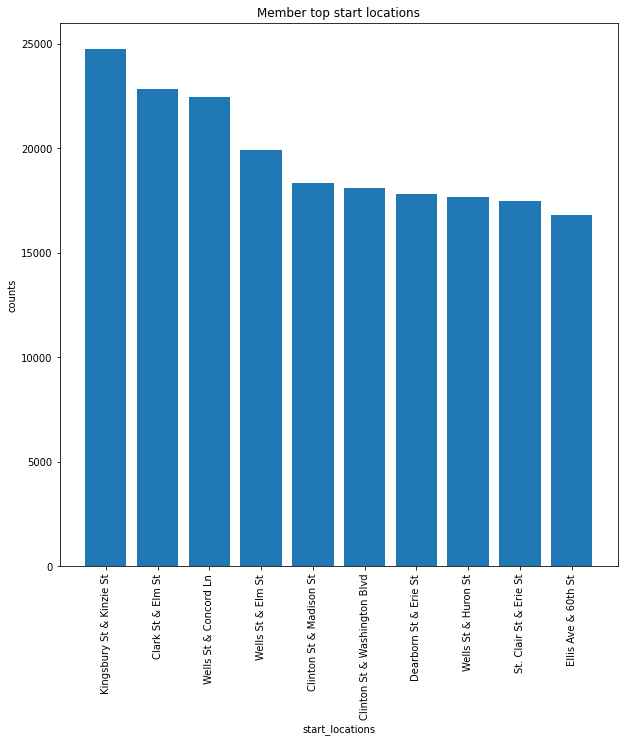

In [14]:
#finding and plotting the top ten start stations for member riders
member_top_start_locations = member.start_station_name.value_counts().sort_values(ascending=False).head(10).rename_axis('unique_counts').reset_index(name='counts')
print(member_top_start_locations)
fig, ax = plt.subplots(figsize = [10,10])
ax.bar(member_top_start_locations['unique_counts'],member_top_start_locations['counts'])

ax.set_ylabel("counts")
ax.set_xlabel("start_locations")
plt.xticks(rotation=90)
plt.title('Member top start locations')

plt.show()

                        unique_counts  counts
0             Streeter Dr & Grand Ave   62390
1                     Millennium Park   28992
2   DuSable Lake Shore Dr & Monroe St   27796
3               Michigan Ave & Oak St   27211
4  DuSable Lake Shore Dr & North Blvd   23039
5                      Shedd Aquarium   21432
6                 Theater on the Lake   19734
7               Wells St & Concord Ln   18266
8              Clark St & Lincoln Ave   15308
9                   Wells St & Elm St   15120


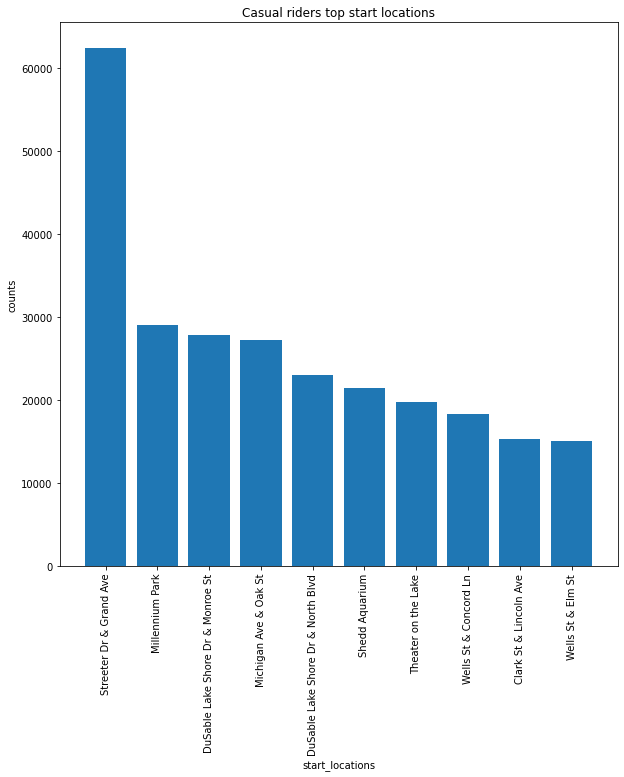

In [15]:
#finding and plotting the top ten start stations for casual riders
casual_top_start_locations= casual.start_station_name.value_counts().sort_values(ascending=False).head(10).rename_axis('unique_counts').reset_index(name='counts')
print(casual_top_start_locations)
fig, ax = plt.subplots(figsize = [10,10])
ax.bar(casual_top_start_locations['unique_counts'],casual_top_start_locations['counts'])

ax.set_ylabel("counts")
ax.set_xlabel("start_locations")
plt.xticks(rotation=90)
plt.title('Casual riders top start locations')

plt.show()


### OBSERVATION
 1. The two rider types have very distinct top start locations <br>
 2. The difference in the member start locations number isnt quit much but the top start loction for the casual riders which is Street Dr and Grand Avenue carries a huge number of casual riders starting from there.

### 4.4 
I will be plotting the Travel distance for each ride type by members.

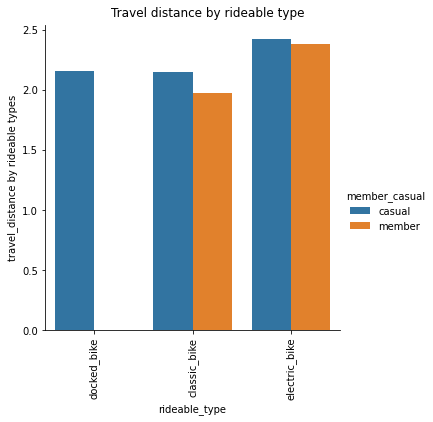

In [16]:
# plotting the travel distance by  rideable type for members and casual riders
g = sns.catplot(x="rideable_type", y='travel_distance', 
                data=divvy_clean, kind="bar",
                hue="member_casual", ci=None)

# Add title and axis labels
g.fig.suptitle("Travel distance by rideable type", y=1.02)
g.set(xlabel="rideable_type", 
       ylabel="travel_distance by rideable types")
plt.xticks(rotation=90)

# Show plot
plt.show()



### OBSERVATION
1. Only casual riders use the docked bike. <br>
2. The casual ridrs cover more ride distance than members.

### 4.5
I would be plotting a histogram to see the range of time in a day that has the highest number of rentage.

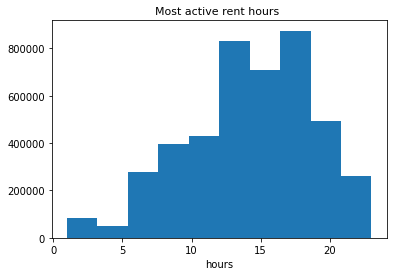

In [17]:
# plotting the a histogram for bike rentage by hour
fig= plt.figure()
ax = fig.add_subplot()
ax.hist(divvy_clean['hour'], bins=10)
# Add title and axis labels
ax.set_title('Most active rent hours ', fontsize=11)
ax.set_xlabel('hours')
# Show plot
plt.show()

Text(0.5, 0, 'hours')

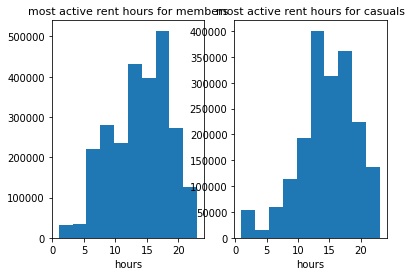

In [18]:
# plotting the a histogram for bike rentage by hour for members and casual riders seperately
fig= plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(member['hour'])
ax2.hist(casual['hour'])

ax1.set_title('most active rent hours for members', fontsize=11)
ax2.set_title('most active rent hours for casuals', fontsize= 11)

ax1.set_xlabel('hours')
ax2.set_xlabel('hours')

### OBSERVATION
1. The most active bike rent hours are from the 13th to 17th hour of each day. <br>
2. The most active bike rent hours for member riders are the 16th and 17th hour with an average of 500000 bike rents a day which is around the end of working hours. <br>
3. The most active rent hours for casual riders are between the 13th and 14th hour of the day with an average of 400000 bike rents a day.

### 4.6
I would be visualising the average travel time for members and casual riders for each hour of the day.

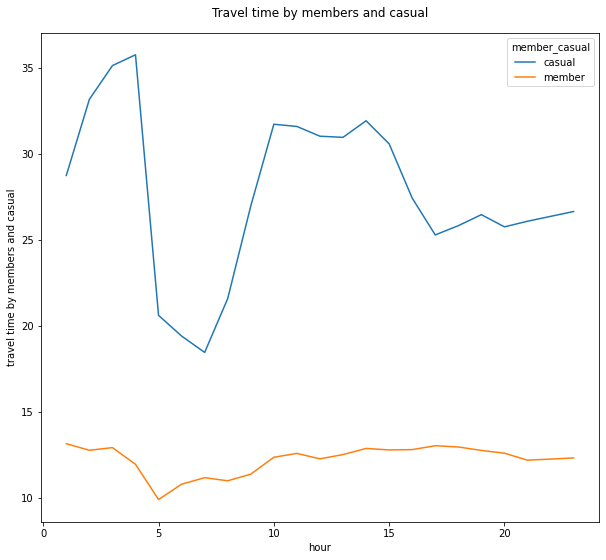

In [19]:
# plotting a lineplot for ride time by hour for members and casual riders seperately
fig, ax = plt.subplots( figsize = [10,9])
g = sns.lineplot(x="hour", y='travel_time', 
                data=divvy_clean,
                hue="member_casual", ci=None, ax=ax)

# Add title and axis labels
g.set_title("Travel time by members and casual", y=1.02)
g.set(xlabel="hour", 
       ylabel="travel time by members and casual")


# Show plot
plt.show()

### OBSERVATION
1. Casual riders spend way more minuts during their rides through out the day. <br>
2. People who pay for membership surprisingly do not spend more than 15 minutes per ride through out the day. <br>
3. Casual riders ride for a max of 36 minuts to a minimum of 18 minutes per ride which is still higher than member riders maximum travel time. <br>
4. Both the member and casual riders spend alot of time riding during the very early hours of each day.

# 5. CONCLUSION AND KEY INSIGHTS

### 5.1 CONCLUSION
  
  1. Members rent the bikes more but the casual riders use them longer after renting  which explains why member riders drive more profit.
  2. Casual riders rent the bikes more during the weekends probably for leisure while members rent more during weekdays.
  3. There are more rents mid year which is close to holidays and least rents during the ending of the year close to the winter season.The casual riders also rent more than member riders during midyear months unlike other months which hints they rent more for leisure usage.
  4. The street is the msot popualr starting point for casual rides.
  5. Only casual riders use docked bikes.

### 5.2 Key Insights
1.  The top 10 start stations and especially the top start station for casual riders(Street Dr and Grand Avenue) would be a strategic area for adverts to changing for converting  their casual riders to members. 
2. Since Casual riders have more travel time, the possibility of having extra benefits for longer rides available for members only would make registering for membership more enticing for casual riders.
3. Marketing should be increased on weekends and should include the interest of people ride for leisure as they are probably an important part of casual riders.
